## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd 
import datetime

In [2]:
df_flights = pd.read_csv("flights", sep=",")
df_flights.head(10)
df_flights.isnull().sum()
new_d_w = df_flights.drop(['mkt_unique_carrier', 'branded_code_share', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'cancellation_code', 'dup', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)

In [3]:
new_d_w_nn = new_d_w.dropna(axis=0) 
new_d_w_nn.shape
new_d_w_nn['dep_time']

0        1415.0
1        1226.0
2        2124.0
3         910.0
4        1155.0
          ...  
49995    1143.0
49996    1940.0
49997    1154.0
49998    1158.0
49999    1748.0
Name: dep_time, Length: 49713, dtype: float64

In [4]:
new_d_w_nn.isnull().sum()

fl_date                0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [5]:
len(new_d_w_nn['arr_delay'])

49713

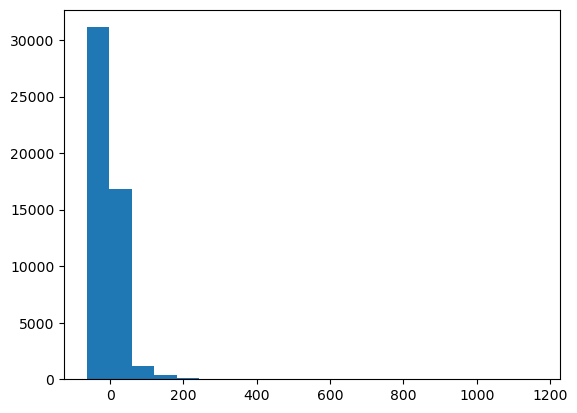

In [6]:
import matplotlib.pyplot as plt

x = new_d_w_nn['arr_delay']
plt.hist(x, bins = 20)
plt.show()

In [7]:
new_d_w_nn['arr_delay']
new_d_w_nn[new_d_w_nn.arr_delay > 300]
new_d_w_nn_out = new_d_w_nn[new_d_w_nn['arr_delay']<= 300] 
new_d_w_nn_out.shape

(49634, 25)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


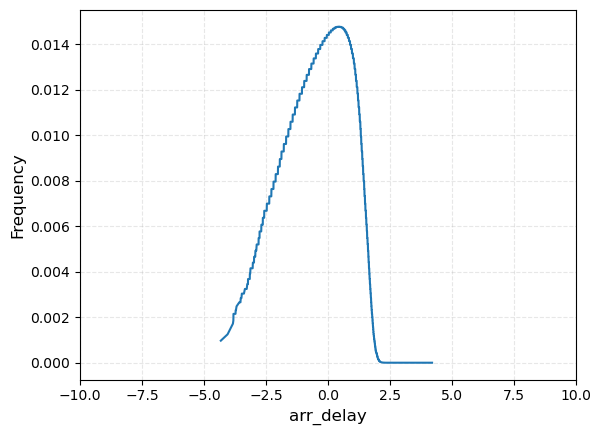

In [8]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Generating data frame
x = np.random.normal(0, 1, 49634)
source = {"quantity": ["1"]*49634, "arr_delay": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(new_d_w_nn_out["arr_delay"])
df_std = np.std(new_d_w_nn_out["arr_delay"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(new_d_w_nn_out["arr_delay"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["arr_delay"].sort_values(), pdf)
plt.xlim([-10,10])  
plt.xlabel("arr_delay", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [9]:
import datetime as dt
from datetime import datetime, date, time, timedelta, timezone
new_d_w_nn['fl_date'] = pd.to_datetime(new_d_w_nn['fl_date'])
new_d_w_nn['month'] = new_d_w_nn['fl_date'].dt.month
new_d_w_nn.head(1)

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/2199636757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['fl_date'] = pd.to_datetime(new_d_w_nn['fl_date'])
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/2199636757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['month'] = new_d_w_nn['fl_date'].dt.month


,fl_date,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,month
0,2018-10-23,DL,2282,DL,ORD,"Chicago, IL",DTW,"Detroit, MI",1420,1415.0,...,1627.0,-16.0,0,0,83,72.0,50.0,1,235,10


In [10]:
new_d_w_nn['month'].value_counts()

10    49713
Name: month, dtype: int64

In [11]:
new_d_w_nn.groupby('month')['arr_delay'].mean()

month
10   -0.105304
Name: arr_delay, dtype: float64

In [12]:
new_d_w_nn.groupby('month')['arr_delay'].median()

month
10   -7.0
Name: arr_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [15]:
new_d_w_nn['crs_dep_time_h']=new_d_w_nn['crs_dep_time']// 100

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/3939134982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['crs_dep_time_h']=new_d_w_nn['crs_dep_time']// 100


In [16]:
new_d_w_nn['crs_dep_time_h']

0        14
1        12
2        21
3         9
4        12
         ..
49995    11
49996    19
49997    12
49998    12
49999    17
Name: crs_dep_time_h, Length: 49713, dtype: int64

In [ ]:
# new_d_w_nn.groupby('crs_dep_time_h', sort=True).count()['taxi_in'].hist(bins=5)
# from pandas import DataFrame
# x = new_d_w_nn['crs_dep_time']    
# y = new_d_w_nn['taxi_in']   
# df = DataFrame({'crs_dep_time':x, 'Taxi_in':y})
# grouped = df.groupby('crs_dep_time')

# df.groupby('crs_dep_time').hist()

In [17]:
taxi_in=new_d_w_nn[new_d_w_nn.taxi_in > 0]
time_days = taxi_in.groupby('crs_dep_time_h')['taxi_in'].count()

y = time_days.reset_index()
x = y.sort_values(by='crs_dep_time_h', ascending=False)

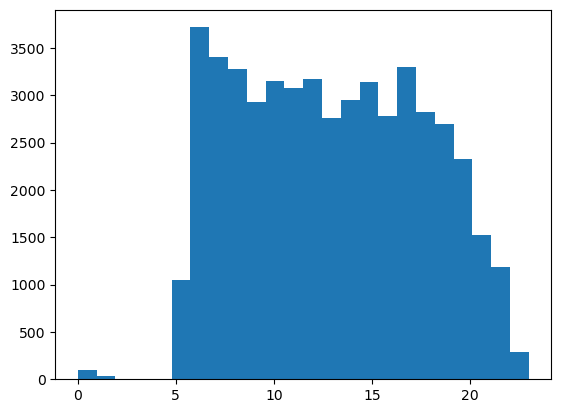

In [20]:
from matplotlib.pyplot import hist
hist(x.crs_dep_time_h, weights=x.taxi_in, bins=24 )
plt.show()

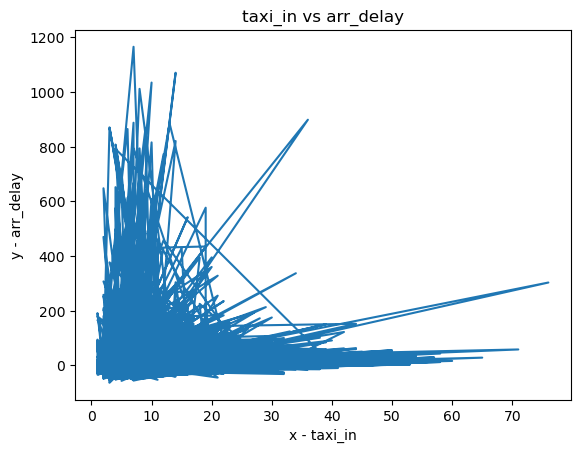

In [21]:
x = new_d_w_nn['taxi_in']
y = new_d_w_nn['arr_delay']

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - taxi_in')
# naming the y axis
plt.ylabel('y - arr_delay')
  
# giving a title to my graph
plt.title('taxi_in vs arr_delay')
  
# function to show the plot
plt.show()


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [22]:
df_delay=new_d_w_nn[new_d_w_nn.arr_delay > 0]
df_delay_departure = df_delay[df_delay.dep_delay > 0]
df_delay['arr_delay'].count()                          

14964

In [23]:
df_delay_departure['arr_delay'].count()
percentage =(9202/14964)*100
print(percentage)

61.49425287356321


yes, it can lower the dealy by better management by the airlines 

#### **Task 6**: How many states cover 50% of US air traffic? 

In [24]:
df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
df_delay[['des_city', 'states_d']] = df_delay['dest_city_name'].str.split(',', expand=True)

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/1793662396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/1793662396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_791/179366239

In [25]:
df_delay[['states_o']].groupby('states_o')['states_o'].count().nlargest(7)#sum()

states_o
 TX    2022
 CA    1577
 FL    1037
 NY     905
 IL     884
 NC     783
 NJ     576
Name: states_o, dtype: int64

In [26]:
x = df_delay[['states_d', 'arr_delay']].groupby('states_d')['arr_delay'].count().reset_index()

In [27]:
y = df_delay[['states_o', 'arr_delay']].groupby('states_o')['arr_delay'].count().reset_index()

In [28]:
df_t_d=pd.merge(y ,x , how='inner',left_on=['states_o'],right_on=['states_d'])

In [29]:
df_t_d['total'] = df_t_d['arr_delay_x']+df_t_d['arr_delay_y']
df_t_d['states']=df_t_d['states_o']
df_s_t =df_t_d.drop(['states_o', 'states_d'],axis=1)
df_s_t['total'].nlargest(7).sum()

15610

7 states covers the total 50% of the air traffics

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [30]:
x = new_d_w_nn['dep_delay']
y = new_d_w_nn['arr_delay']

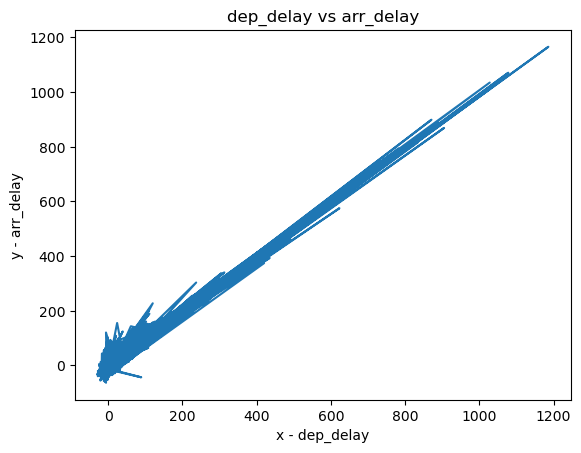

In [31]:
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - dep_delay')
# naming the y axis
plt.ylabel('y - arr_delay')
  
# giving a title to my graph
plt.title('dep_delay vs arr_delay')
  
# function to show the plot
plt.show()

No, when the flight is delay, the arrive delay similar time. So, won't affect plane faster.

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [32]:
# 'SHORT',: less than 3 hours; 'MEDIUM,: more than 3 hours less than 6 hours ; 'LONG': more than 6 hours 
new_d_w_nn.loc[new_d_w_nn['crs_elapsed_time'] <= 180.0, 'crs_elapsed_time'] = 0
new_d_w_nn.loc[((new_d_w_nn['crs_elapsed_time']>180.0) & (new_d_w_nn['crs_elapsed_time']<=360.0)), 'crs_elapsed_time'] = 1
new_d_w_nn.loc[new_d_w_nn['crs_elapsed_time'] > 360.0, 'crs_elapsed_time'] = 2

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


crs_dep_time
      [[AxesSubplot(0.125,0.11;0.775x0.77)]]
1     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
10    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
11    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
12    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
13    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
14    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
15    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
16    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
17    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
18    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
19    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
2     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
20    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
21    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
22    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
23    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
3     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
4     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
5     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
6     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
7     [[AxesSubplot(0.125,0.11;0.775x0.77)

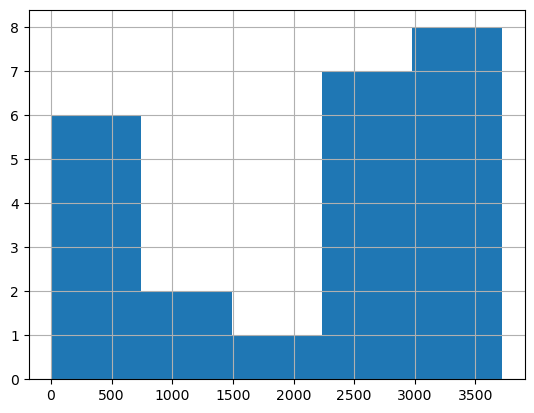

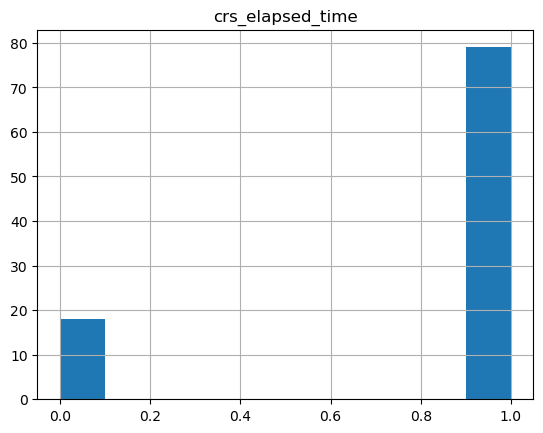

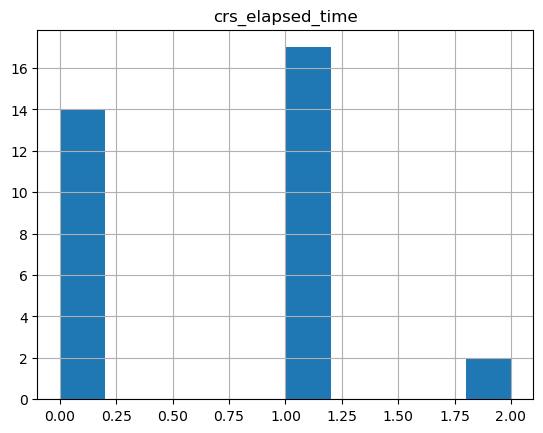

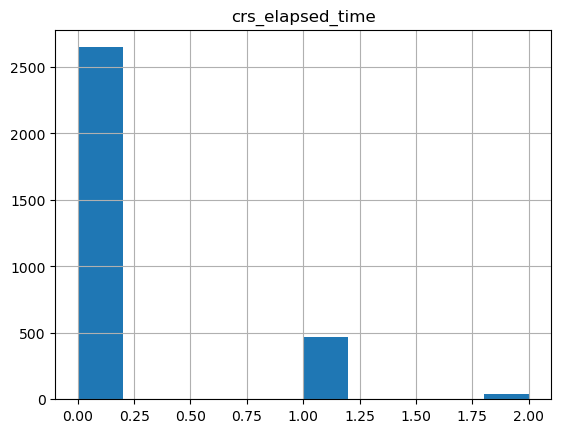

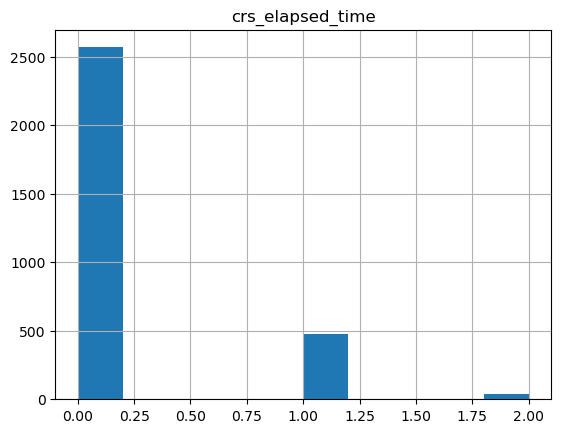

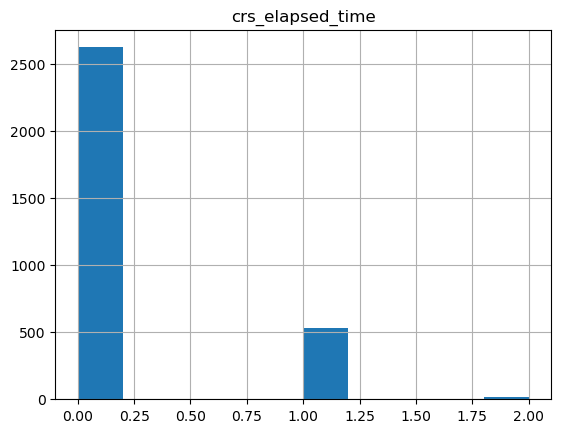

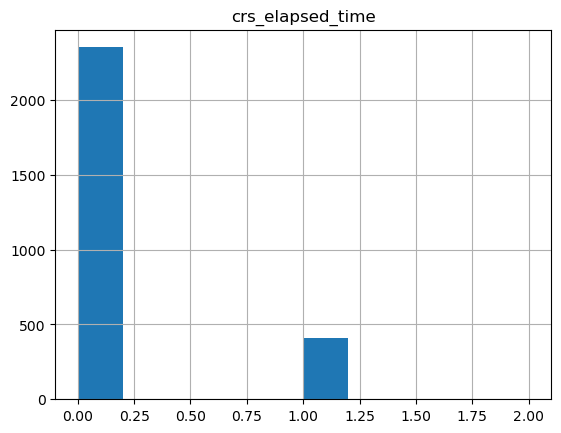

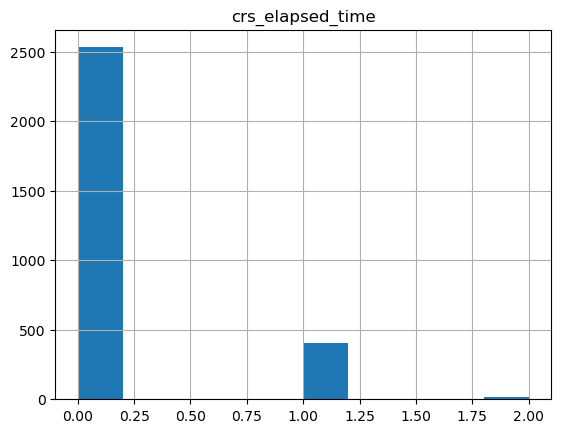

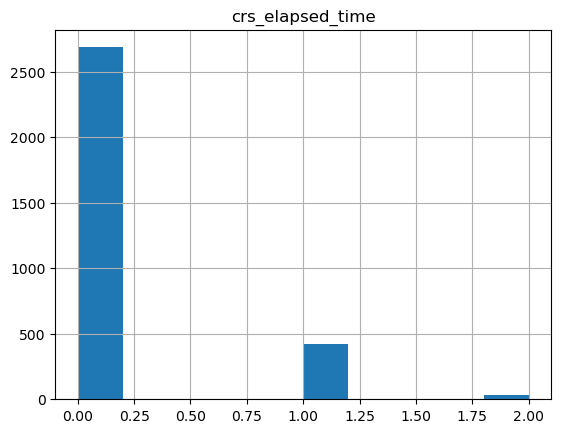

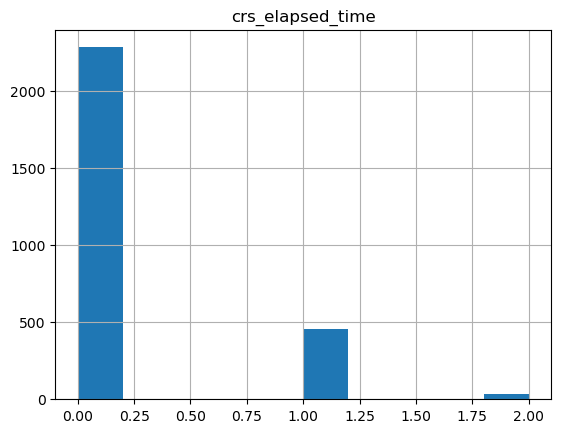

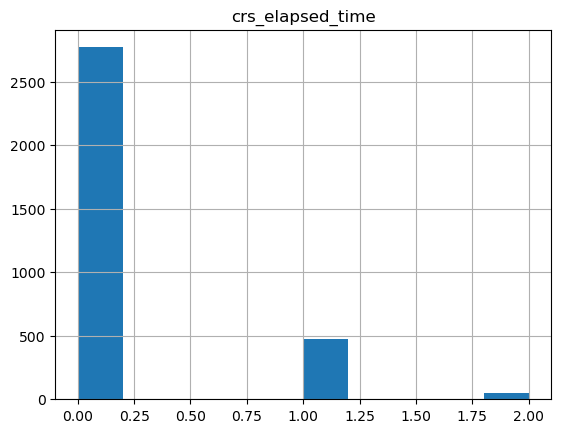

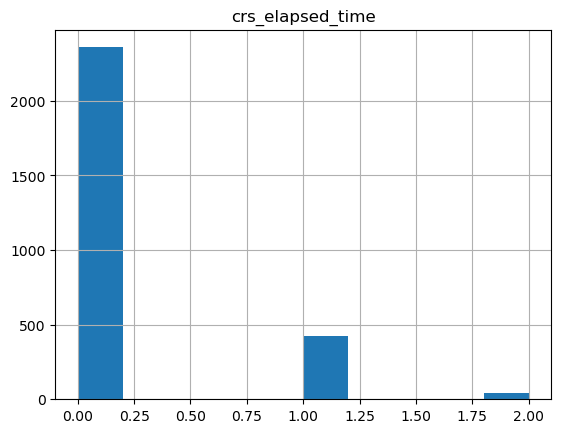

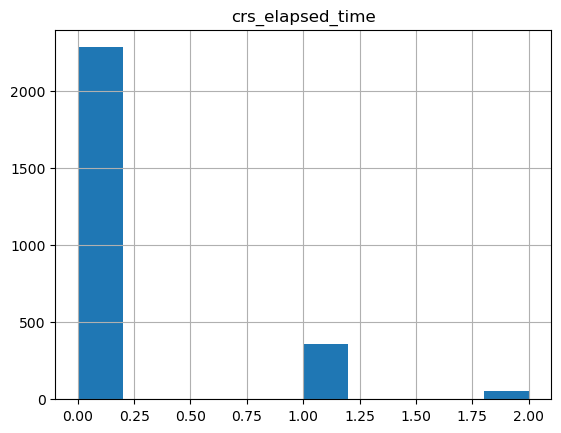

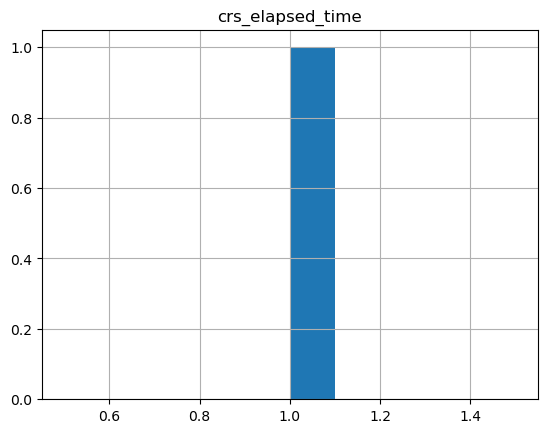

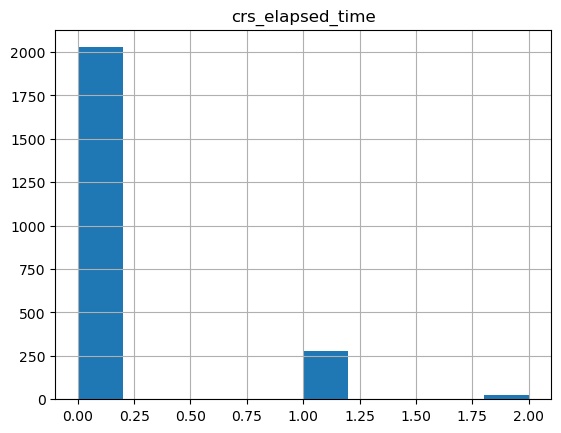

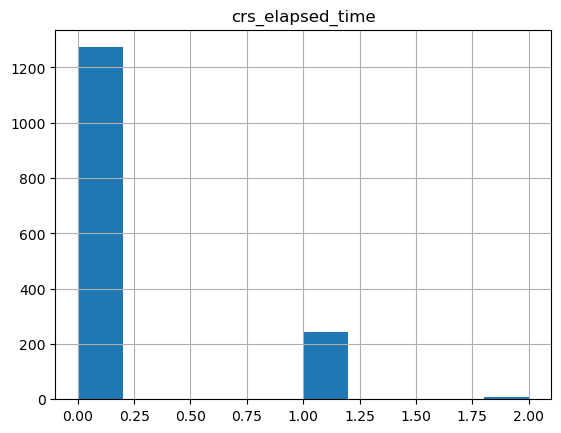

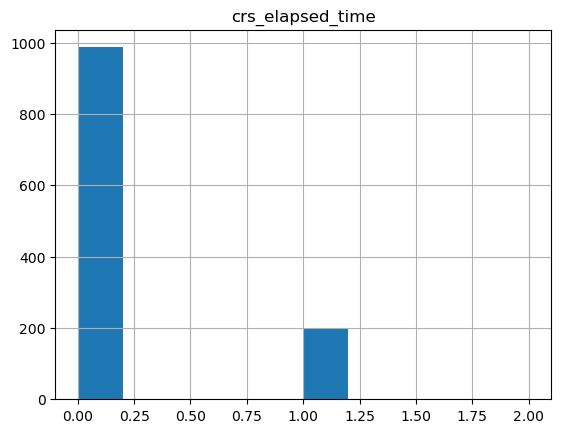

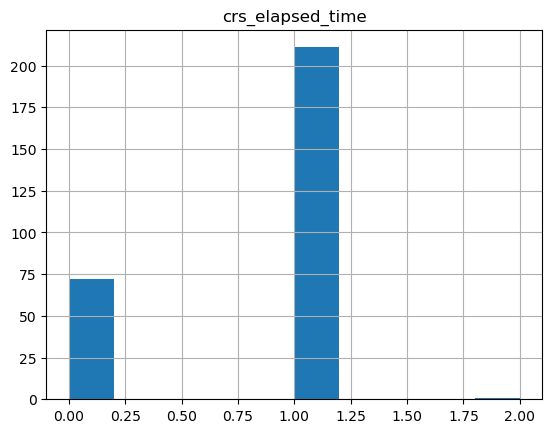

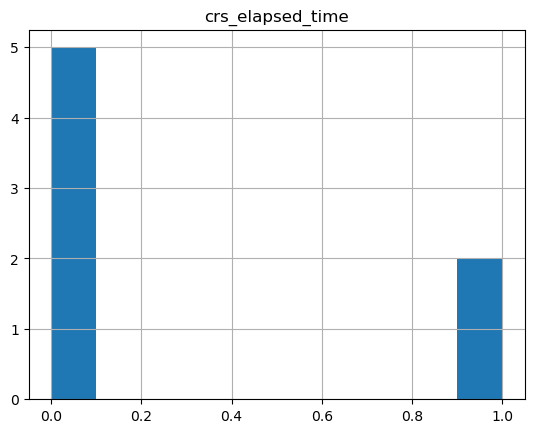

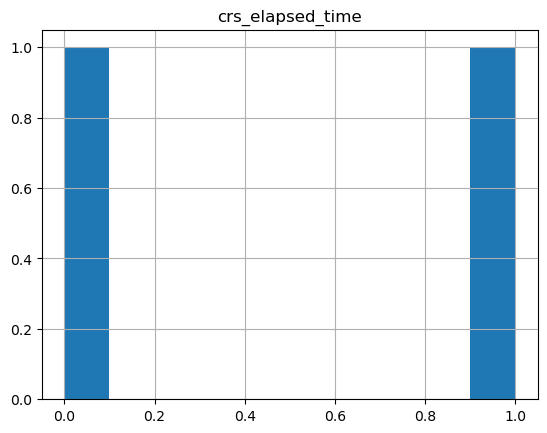

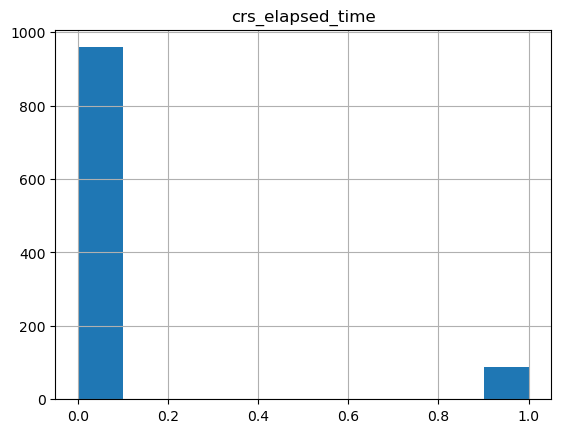

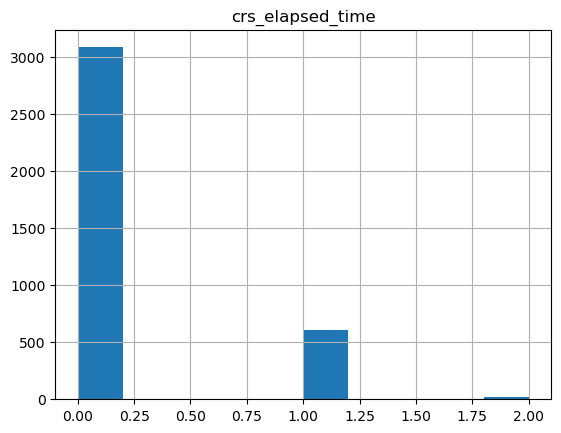

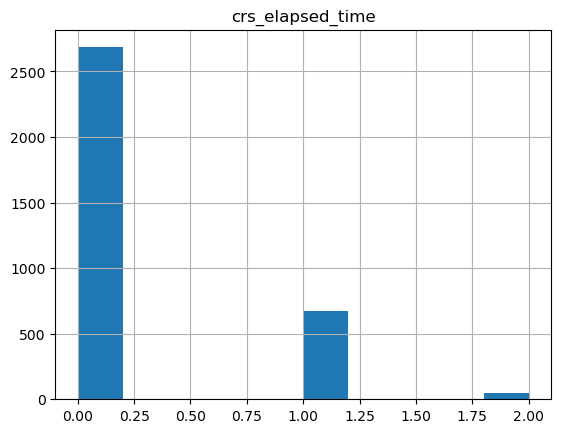

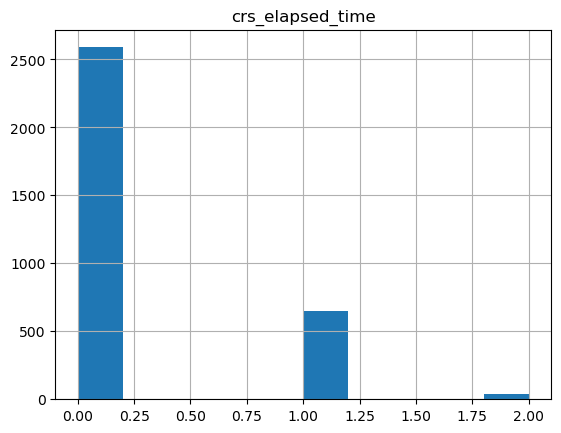

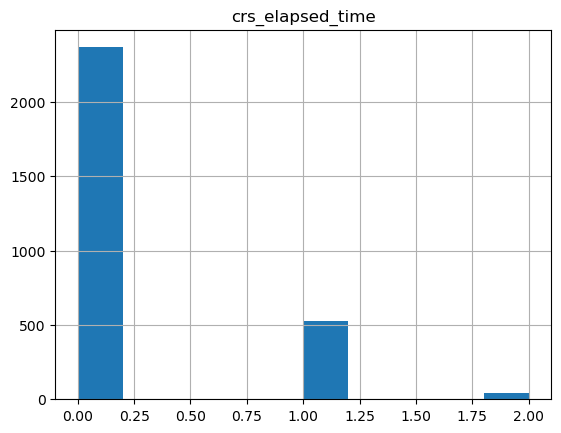

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

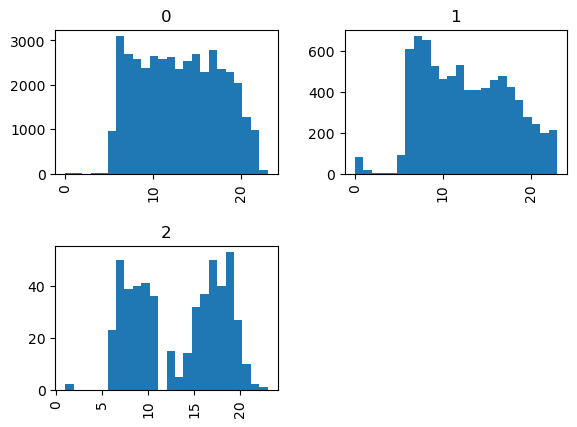

In [35]:
new_d_w_nn.hist(by='crs_elapsed_time', column='crs_dep_time_h', bins=24)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [36]:
new_d_w_nn.head(2)

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,month,crs_dep_time_h
0,2018-10-23,DL,2282,DL,ORD,"Chicago, IL",DTW,"Detroit, MI",1420,1415.0,...,-16.0,0,0,0,72.0,50.0,1,235,10,14
1,2018-10-23,DL,2283,DL,ORD,"Chicago, IL",DTW,"Detroit, MI",1236,1226.0,...,-25.0,0,0,0,69.0,46.0,1,235,10,12


In [37]:
busy_ap = new_d_w_nn.groupby(['origin'])['flights'].count().nlargest(10) 
busy_ap

origin
ORD    2980
DEN    1907
ATL    1882
DFW    1665
CLT    1637
LAX    1363
IAH    1314
EWR    1271
LGA    1265
SFO    1222
Name: flights, dtype: int64

In [38]:
busy_ap.sum()

16506

In [39]:
df_delay_top=new_d_w_nn[new_d_w_nn.arr_delay > 0]
df_delay_top_c = df_delay_top.groupby(['origin'])['flights'].count().nlargest(15) 
total_delay_inbu = df_delay_top_c['ORD'] + df_delay_top_c['DEN']+df_delay_top_c['ATL']+df_delay_top_c['DFW']+df_delay_top_c['CLT']+df_delay_top_c['LAX']+df_delay_top_c['IAH']+df_delay_top_c['EWR']+df_delay_top_c['LGA']+df_delay_top_c['SFO']
total_delay_inbu

5131

In [40]:
df_delay_top.shape

(14964, 27)

In [41]:
cover = (5131/14964)*100
cover

34.28896017107726

In [42]:
df_p = pd.read_csv("passengers", sep=",")
df_p.head(10)
busy_ps = df_p.groupby(['origin'])['passengers'].count().nlargest(10) 
busy_ps 

origin
ORD    2121
ATL    1562
DEN    1383
IAH    1354
DTW    1340
MSP    1258
EWR    1030
CLT    1028
DFW     983
LAX     945
Name: passengers, dtype: int64

In [43]:
new_d_rs = new_d_w_nn.sample(n=5000)
new_d_pr = df_p.sample(n=5000)
df_cd=pd.merge(new_d_rs, new_d_pr, how='inner',left_on=['op_unique_carrier'],right_on=['unique_carrier'])

In [44]:
df_r = df_cd.groupby(['origin_x']).agg({'flights':'sum','passengers':'sum'})
df_r

,flights,passengers
origin_x,,
ABE,749,35222
ABI,159,7152
ABQ,4361,541271
ABR,519,23158
ABY,519,23158
...,...,...
TXK,318,14304
TYS,2439,209439
USA,161,27240


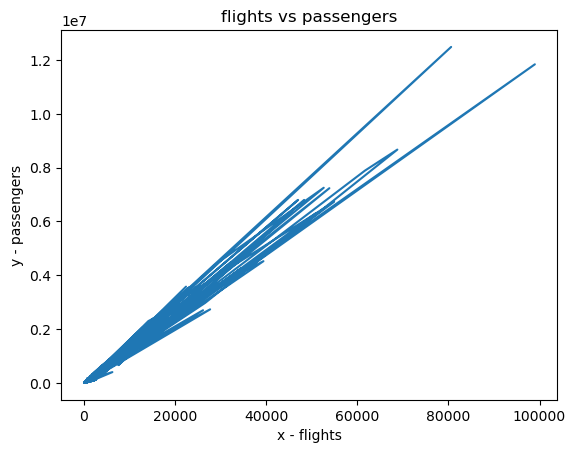

In [45]:
x = df_r['flights']
y = df_r['passengers']

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - flights')
# naming the y axis
plt.ylabel('y - passengers')
  
# giving a title to my graph
plt.title('flights vs passengers')
  
# function to show the plot
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [43]:
### Get three tables ramdom select 5000 rows 
new_d_rs = new_d_w_nn.sample(n=5000) ###flights table
### passenger tables 
df_passen = pd.read_csv("passengers", sep=",")
df_p_n = df_passen[['payload','passengers', 'departures_scheduled', 'month', 'unique_carrier']]
new_d_pr = df_p_n.sample(n=5000)
### fuel consumption 
df_fuel = pd.read_csv("fuel_comsumption", sep=",")
df_fuel_n = df_fuel.dropna(axis=0) 

In [52]:
####Avergage delay per carrier 
df_cd=pd.merge(new_d_rs, new_d_pr, how='inner',left_on=['op_unique_carrier'],right_on=['unique_carrier'])
df_cd[['month_x', 'month_y']]#[['unique_carrier', 'arr_delay', 'month']]

,month_x,month_y
0,10,12
1,10,5
2,10,1
3,10,7
4,10,3
...,...,...
1505480,10,5
1505481,10,9
1505482,10,5
1505483,10,9
